# Plotting

In [1]:
import remeta
%load_ext autoreload
%autoreload 2

ReMeta includes three methods that offer some basic plotting functionality of type 1 and 2 data.

To illustrate, we simulate a dataset:

In [2]:
cfg = remeta.Configuration()
params = dict(
    type1_noise=0.5,
    type1_bias=0.15,
    type2_noise=0.2,
    type2_criteria=[0.25, 0.5, 0.75]
)
ds = remeta.simulate(nsamples=1000, params=params, squeeze=True, stim_levels=4, cfg=cfg)

----------------------------------
..Generative model:
    Type 1 noise distribution: normal
    Type 2 noise type: report
    Type 2 noise distribution: beta_mode
..Generative parameters:
    type1_noise: 0.5
    type1_bias: 0.15
    type2_noise: 0.2
    type2_criteria: [0.25 0.5  0.75]
        [extra] Criterion bias: 0.0000
        [extra] Criterion-based confidence bias: 0.0000
..Descriptive statistics:
    No. subjects: 1
    No. samples: 1000
    Accuracy: 84.2% correct
    d': 2.1
    Choice bias: 7.4%
    Confidence: 0.56
    M-Ratio: 0.35
    AUROC2: 0.60
----------------------------------


... and fit a ReMeta model:

In [3]:
cfg.optim_type2_gridsearch = False
rem = remeta.ReMeta(cfg)
rem.fit(ds.stimuli, ds.choices, ds.confidence)
result = rem.summary()

Dataset characteristics:
    No. subjects: 1
    No. samples: 1000
    Accuracy: 84.2% correct
    d': 2.111
    Choice bias: 7.4%
    Mean confidence: 0.564 (min: 0.125, max: 0.875)

+++ Type 1 level +++
  Subject-level estimation (MLE)
    .. finished (0.1 secs).
  Final report
    Parameters estimates (subject-level fit)
        [subject] type1_noise: 0.527 ± 0.026
        [subject] type1_bias: 0.192 ± 0.027
    [subject] Log-likelihood: -370.02 (per sample: -0.37)
    [subject] Fitting time: 0.11 secs
Type 1 level finished

+++ Type 2 level +++
  Subject-level estimation (MLE)
    .. finished (29.9 secs).
  Final report
    Parameters estimates (subject-level fit)
        [subject] type2_noise: 0.222 ± 0.032
        [subject] type2_criteria: [0.230 ± 0.016, 0.474 ± 0.016, 0.736 ± 0.012]
            [extra] type2_criteria_bias: -0.015 ± 0.011
            [extra] type2_criteria_confidence_bias: 0.015 ± 0.011
    [subject] Log-likelihood: -1687.52 (per sample: -1.688)
    [subject] Fi

## plot_psychometric

Data-driven psychometric curve:

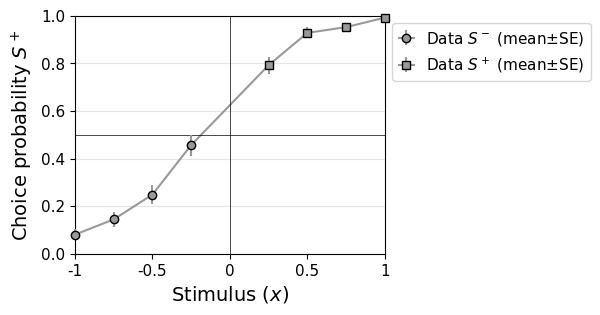

In [4]:
remeta.plot_psychometric(ds.stimuli, ds.choices)

Plot data alongside fitted parameters. In this case, `plot_psychometric` can be called from the ReMeta object:

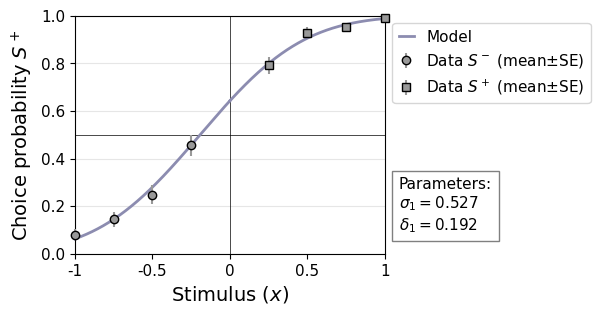

In [5]:
rem.plot_psychometric()

Plot model only:

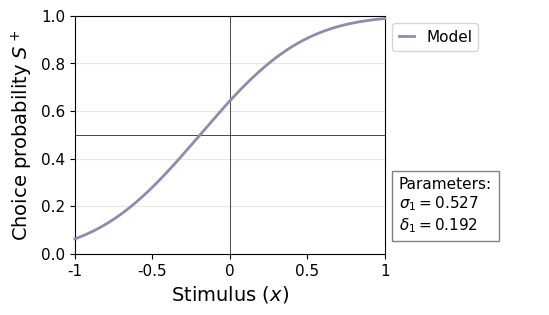

In [6]:
rem.plot_psychometric(model_only=True)

Plot arbitray (theoretical) psychometric curve:

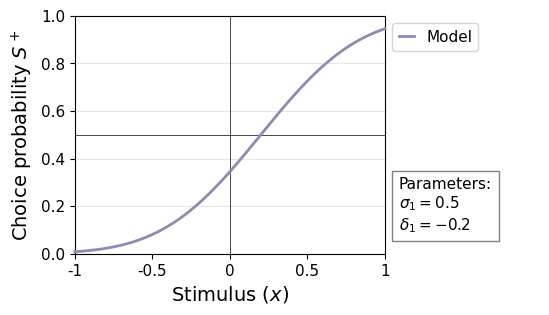

In [7]:
remeta.plot_psychometric(type1_noise_dist='normal', type1_noise=0.5, type1_bias=-0.2)

## plot_stimulus_versus_confidence

Data-driven plot:

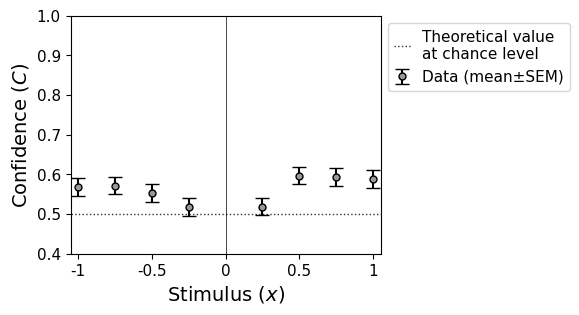

In [8]:
remeta.plot_stimulus_versus_confidence(ds.stimuli, ds.confidence, ds.choices)

Plot data alongside fitted parameters. In this case, `plot_stimulus_versus_confidence` can be called from the ReMeta object:

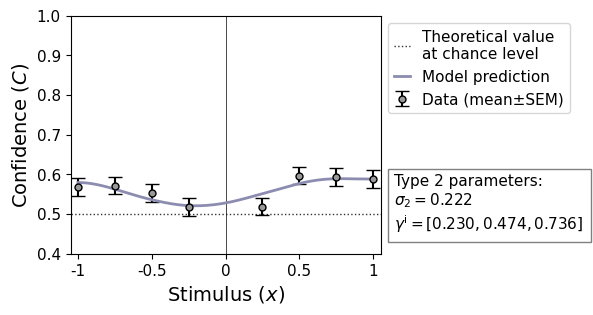

In [9]:
rem.plot_stimulus_versus_confidence()

Separate by accuracy:

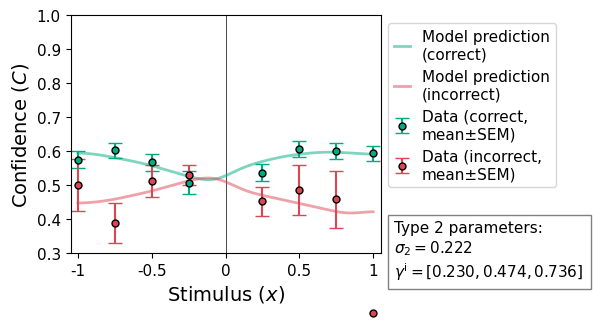

In [10]:
rem.plot_stimulus_versus_confidence(separate_by_accuracy=True)

Plot model only:

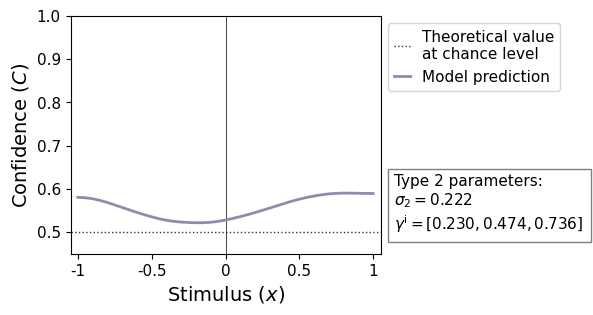

In [11]:
rem.plot_stimulus_versus_confidence(model_only=True)

Plot arbitray (theoretical) stimulus-confidence relationship (reqiores at least `type1_noise` and `type2_noise`):

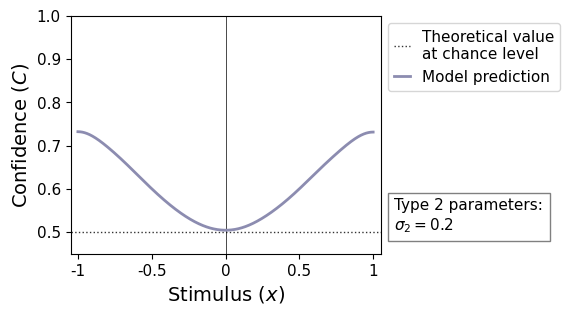

In [12]:
remeta.plot_stimulus_versus_confidence(type1_noise=0.5, type2_noise=0.2)

## plot_confidence_histogram

Data-driven plot:

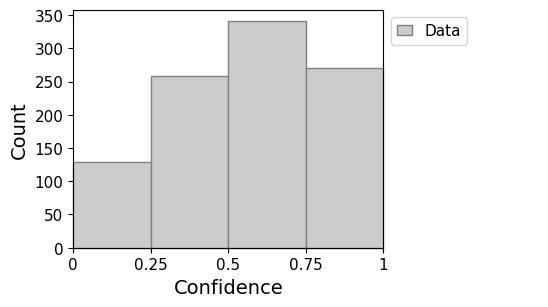

In [13]:
remeta.plot_confidence_histogram(ds.confidence)

Plot data alongside fitted parameters. In this case, `plot_confidence_histogram` can be called from the ReMeta object:

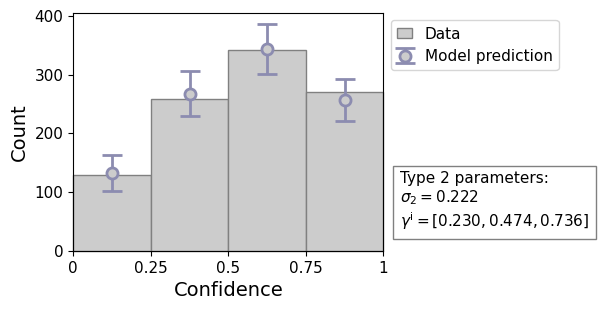

In [14]:
rem.plot_confidence_histogram()

Separate by accuracy:

1000 2000


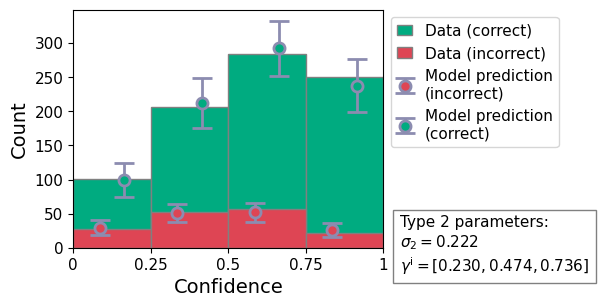

In [15]:
rem.plot_confidence_histogram(separate_by_accuracy=True)

Separate by stimulus category:

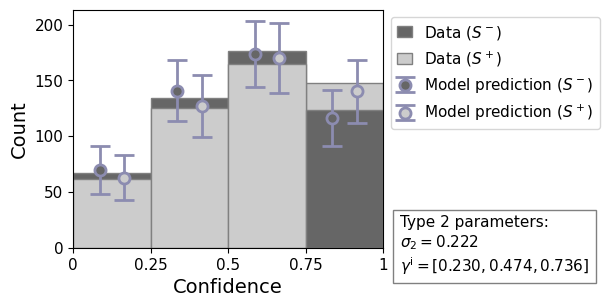

In [16]:
rem.plot_confidence_histogram(separate_by_category=True)

Plot model only:

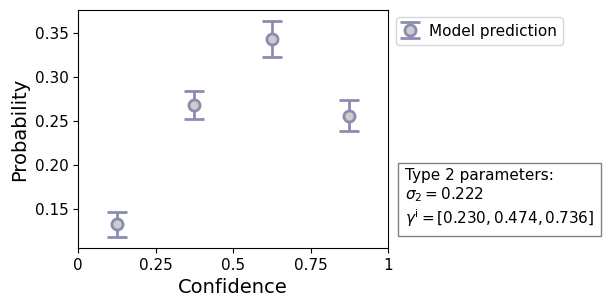

In [17]:
rem.plot_confidence_histogram(model_only=True)

Plot arbitray (theoretical) confidence distribution (reqiores at least `type1_noise` and `type2_noise`):

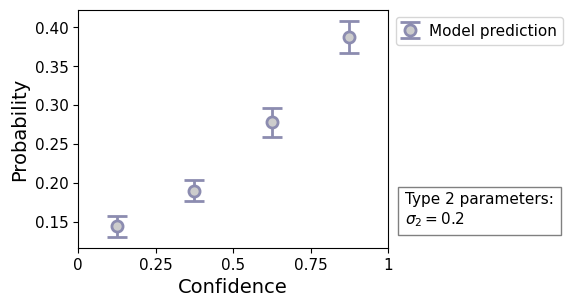

In [18]:
remeta.plot_confidence_histogram(type1_noise=0.5, type2_noise=0.2)

Change the type 2 noise distribution by passing a `Configuration` object:

In [19]:
cfg.param_type2_noise.distribution = 'truncated_normal_mode'

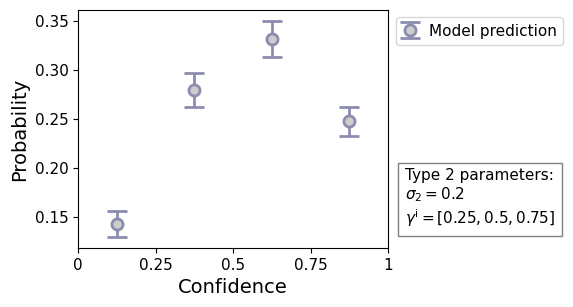

In [20]:
remeta.plot_confidence_histogram(
    type1_noise=0.5, type2_noise=0.2, type2_criteria=[0.25, 0.5, 0.75], cfg=cfg
)